Text(0, 0.5, 'cos(longitude of pericenter of Titan - mean longitude of Sun)')

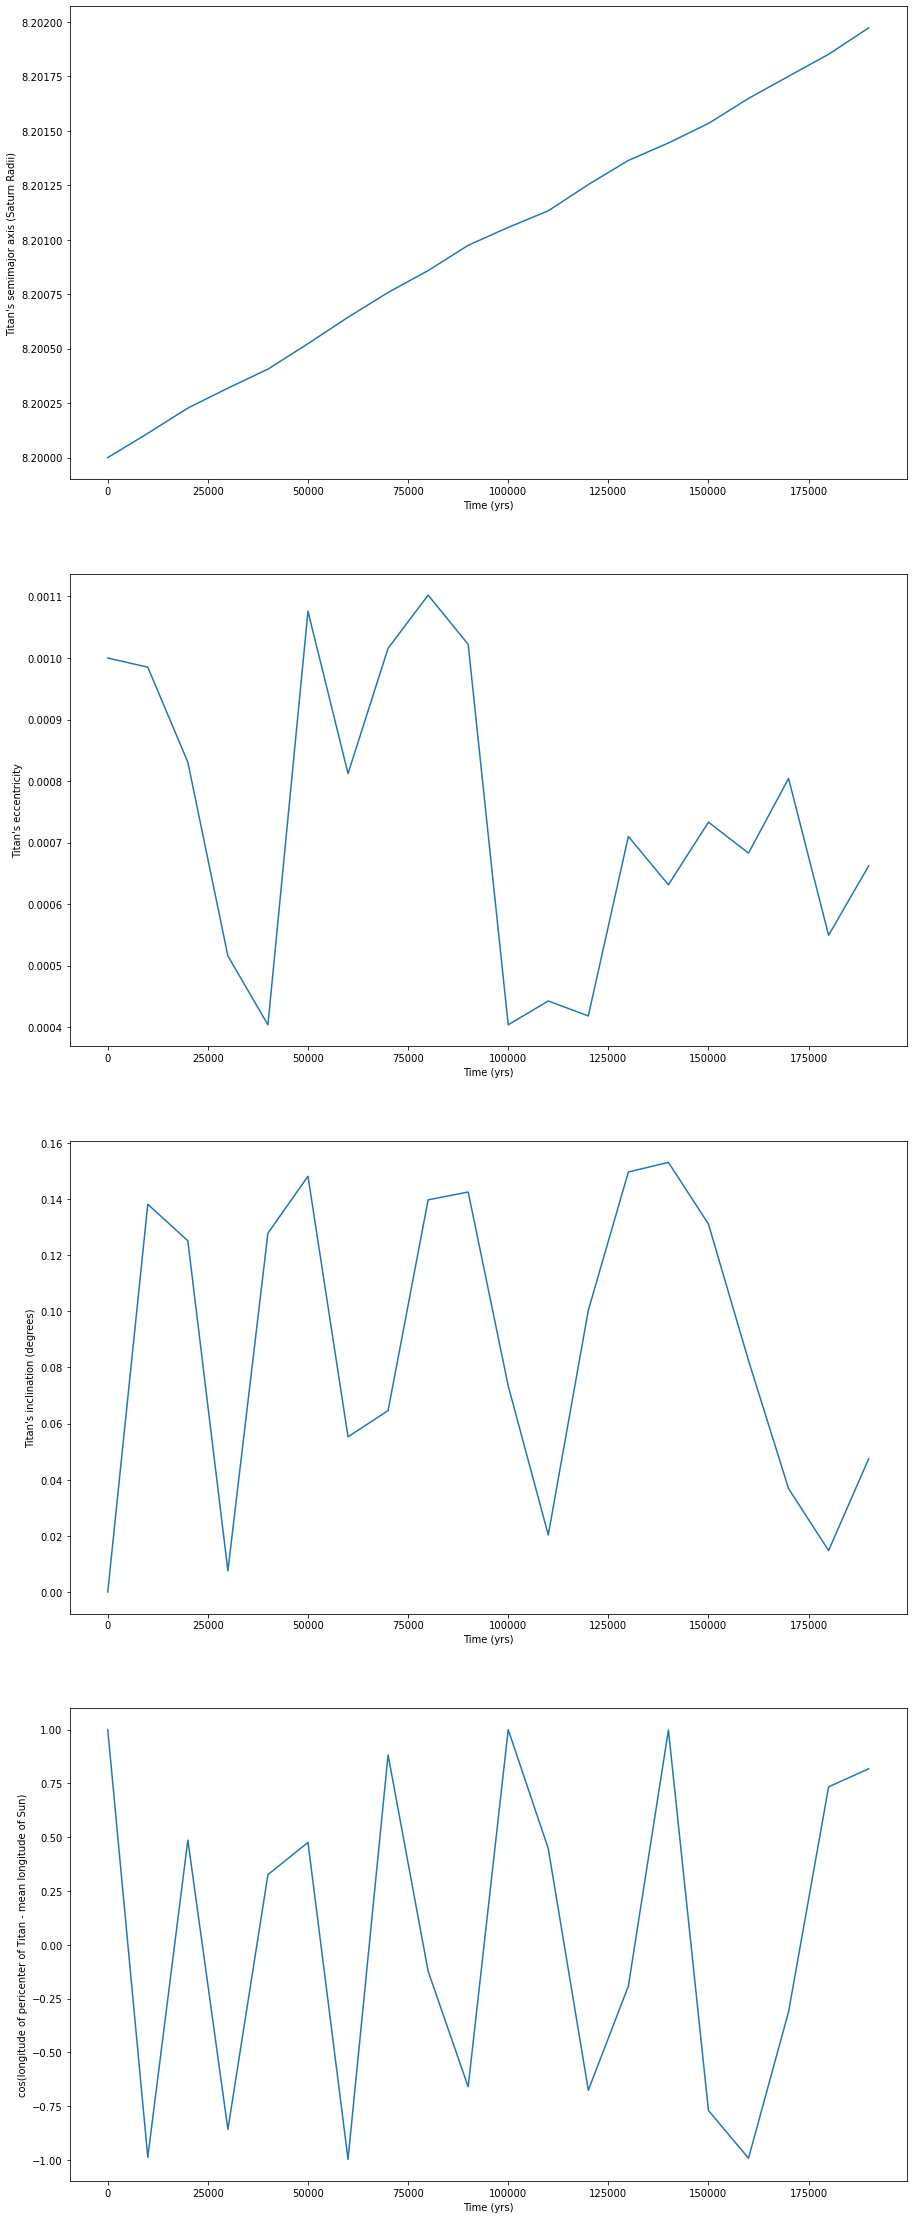

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# read arguments, and open corresponding output file
version = 4
numSamples = 20
fa = 8.5
simTime = .2
step = 1
buffer = 4

if version == 3:
    f = open(r"v3out-div1.0-"+str(numSamples)+"s-8.2to"+str(fa)+"rs.txt", "r")
else:
    f = open(r"v4.1-t-8.2rs-"+str(numSamples)+"s-"+str(simTime)+"myrs.txt", "r")


plotSamples = numSamples // step

# prep 5 arrays
a_array = [0] * plotSamples
e_array = [0] * plotSamples
i_array = [0] * plotSamples
t_array = [0] * plotSamples
diff_array = [0] * plotSamples

# read file
allLines = f.readlines()
f.close()
if (version == 3):
    incl_index = 4
    pomega_index = 2
    m_long_index = 3
else:
    incl_index = 2
    pomega_index = 3
    m_long_index = 4
for i in range(buffer, buffer + numSamples, step):
    numbers = allLines[i].split()
    a_array[(i - buffer) // step] = float(numbers[0])
    e_array[(i - buffer) // step] = float(numbers[1])
    i_array[(i - buffer) // step] = float(numbers[incl_index])*180./np.pi
    t_array[(i - buffer) // step] = float(numbers[5])
    diff_array[(i - buffer) // step] = np.cos(float(numbers[pomega_index]) - float(numbers[m_long_index]))

fig, axs = plt.subplots(4)

fig.set_size_inches(15, 40)

axs[0].plot(t_array,a_array)
axs[0].set_xlabel('Time (yrs)')
axs[0].set_ylabel('Titan\'s semimajor axis (Saturn Radii)')

axs[1].plot(t_array,e_array)
axs[1].set_xlabel('Time (yrs)')
axs[1].set_ylabel('Titan\'s eccentricity')

axs[2].plot(t_array,i_array)
axs[2].set_xlabel('Time (yrs)')
axs[2].set_ylabel('Titan\'s inclination (degrees)')

axs[3].plot(t_array,diff_array)
axs[3].set_xlabel('Time (yrs)')
axs[3].set_ylabel('cos(longitude of pericenter of Titan - mean longitude of Sun)')

In [2]:
start_ratio = 0.
end_ratio = 1./8.

plotSamplesZ = int(numSamples * (end_ratio - start_ratio))

start_i = int(start_ratio * numSamples) + buffer
end_i = start_i + plotSamplesZ

# prep 3 arrays
a_arrayZ = [0] * plotSamplesZ
e_arrayZ = [0] * plotSamplesZ
i_arrayZ = [0] * plotSamplesZ
t_arrayZ = [0] * plotSamplesZ
diff_arrayZ = [0] * plotSamplesZ

for i in range(start_i, end_i):
    numbers = allLines[i].split()
    a_arrayZ[i - start_i] = float(numbers[0])
    e_arrayZ[i - start_i] = float(numbers[1])
    i_arrayZ[i - start_i] = float(numbers[4])
    diff_arrayZ[i - start_i] = np.cos(float(numbers[2]) - float(numbers[3]))
    t_arrayZ[i - start_i] = float(numbers[5])

figZ, axsZ = plt.subplots(4)

figZ.set_size_inches(30, 80)

axsZ[0].plot(t_arrayZ,a_arrayZ)
axsZ[0].set_xlabel('Time (yrs)')
axsZ[0].set_ylabel('Titan\'s semimajor axis (Saturn Radii)')

axsZ[1].plot(t_arrayZ,e_arrayZ)
axsZ[1].set_xlabel('Time (yrs)')
axsZ[1].set_ylabel('Titan\'s eccentricity')

axsZ[2].plot(t_arrayZ,diff_arrayZ)
axsZ[2].set_xlabel('Time (yrs)')
axsZ[2].set_ylabel('cos(pomega - mean anomaly)')

axsZ[3].plot(t_arrayZ,i_arrayZ)
axsZ[3].set_xlabel('Time (yrs)')
axsZ[3].set_ylabel('Inclination of Titan (rad)')

NameError: name 'allLines' is not defined

Text(0, 0.5, 'Eccentricity damping timescale (yrs)')

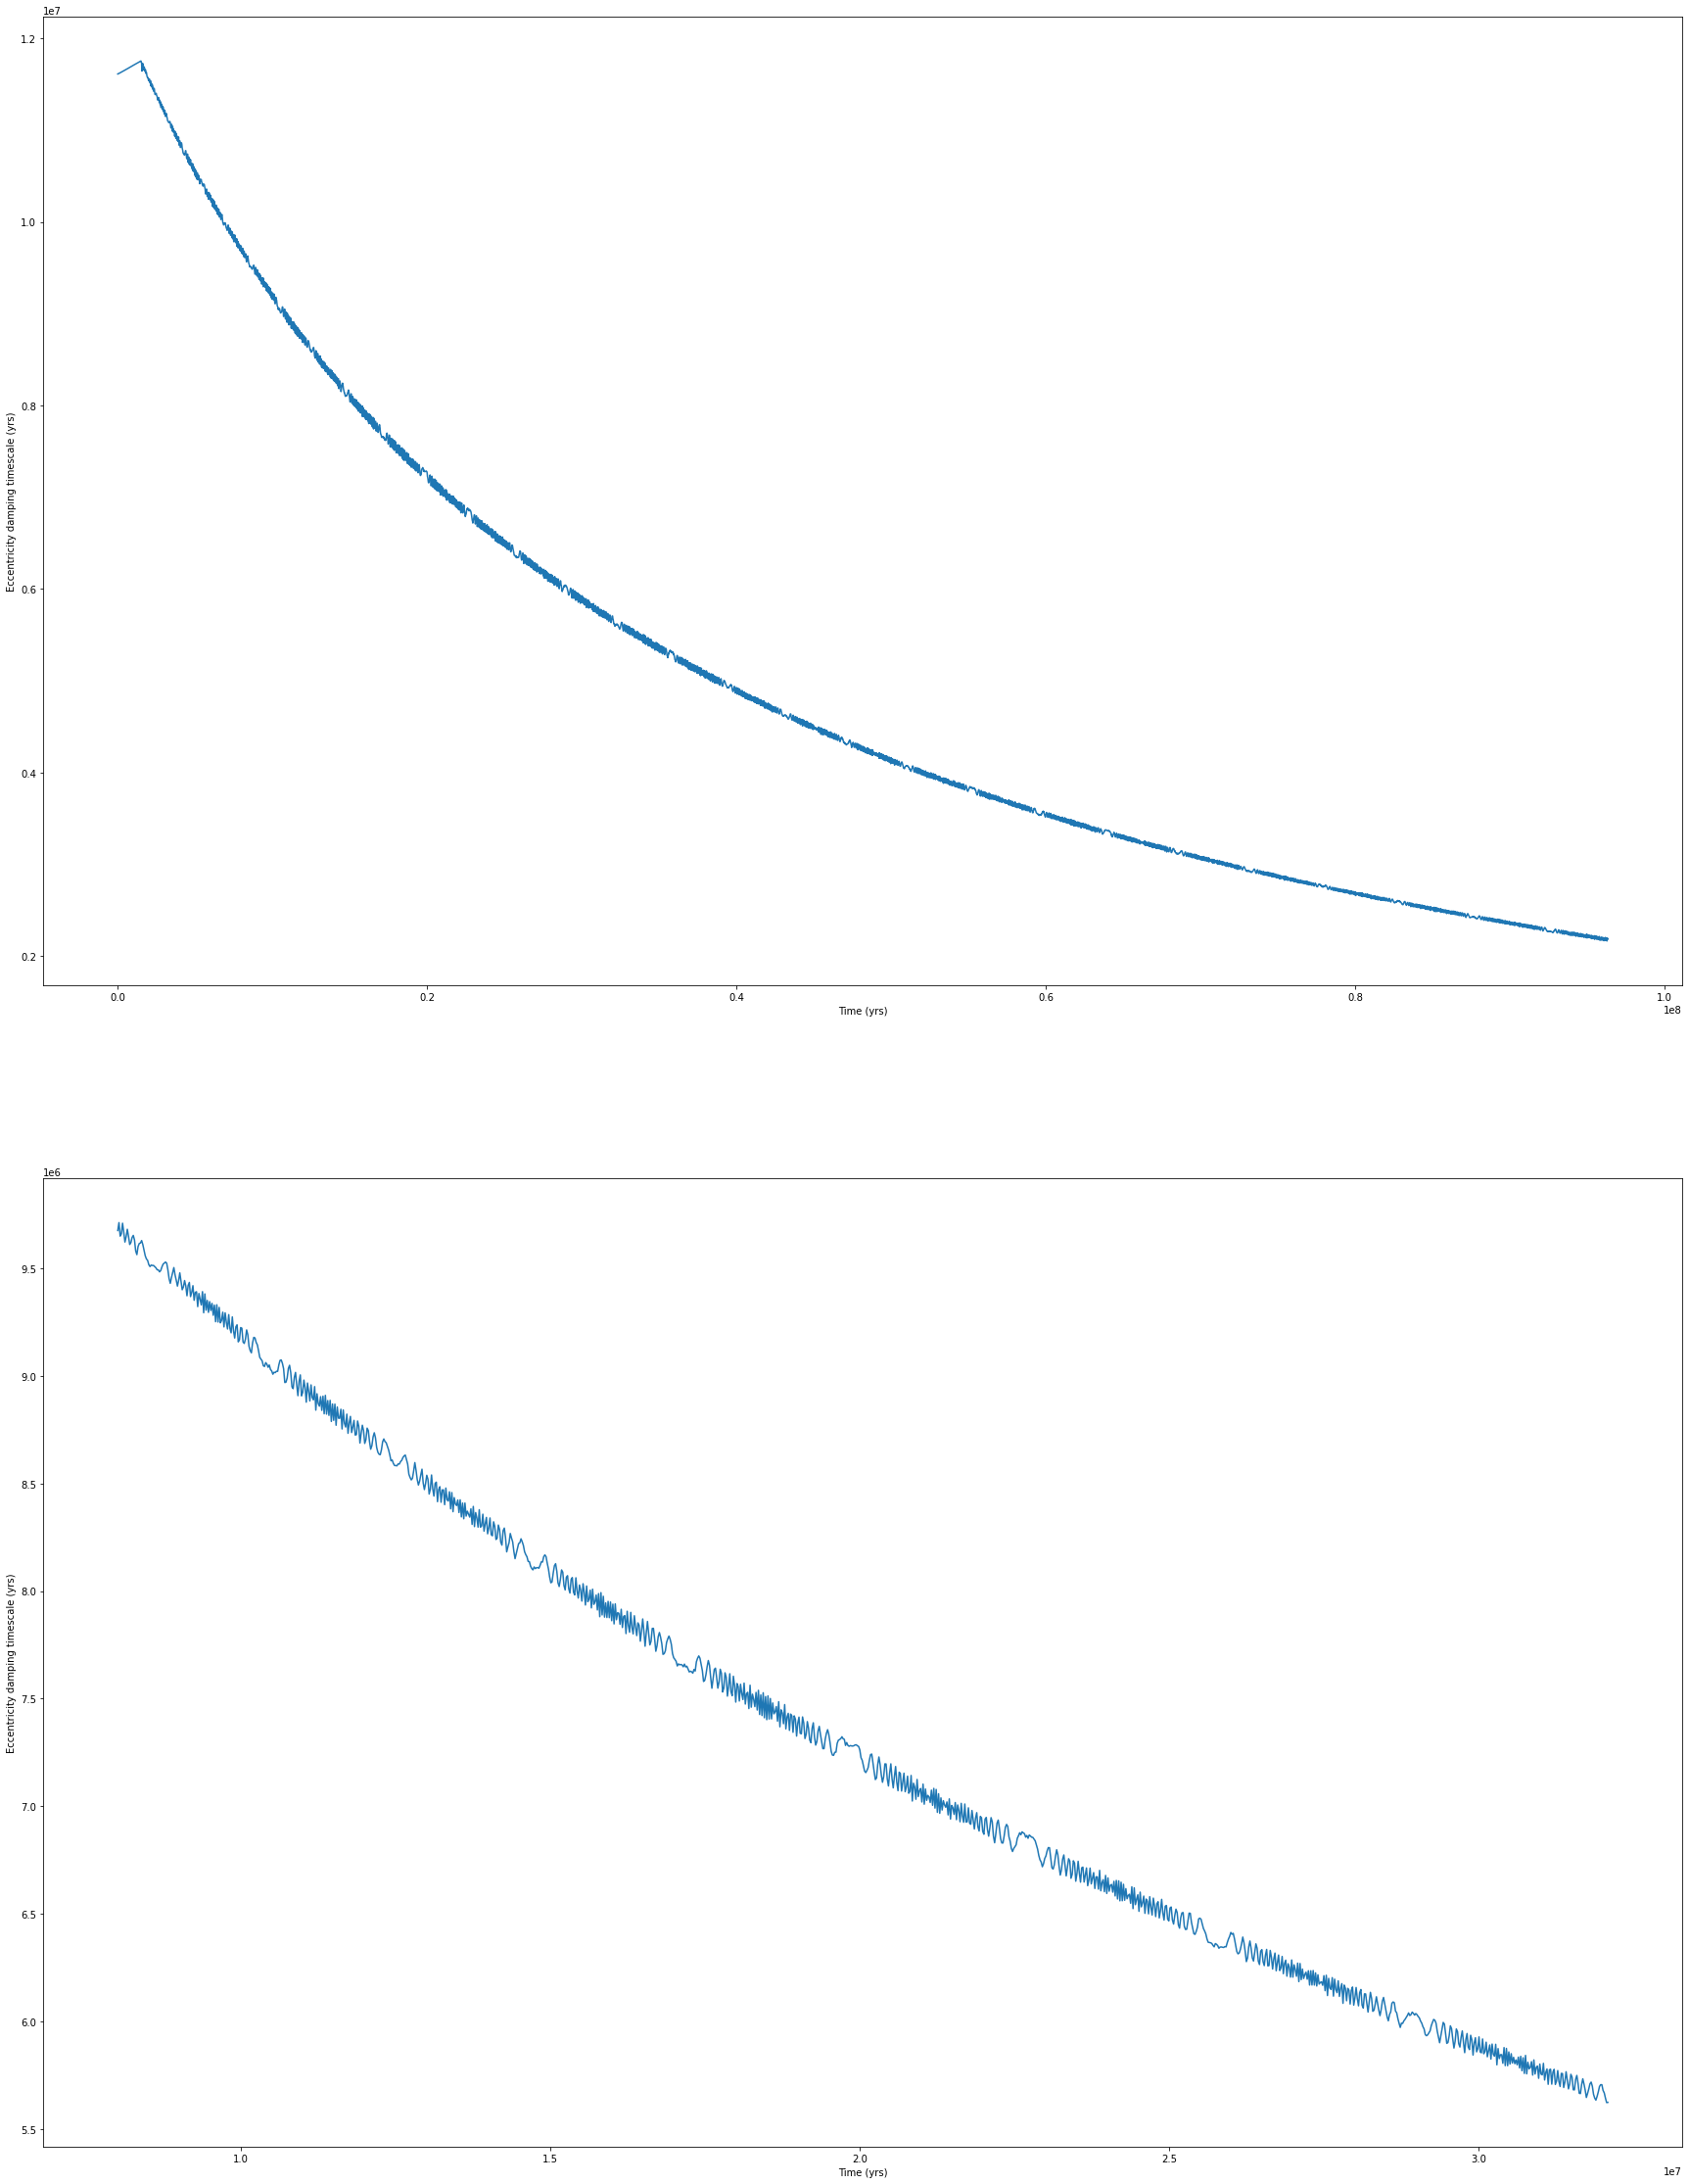

In [3]:
# Plot eccentricity decay timescale over time
G = 6.67e-11 # G in SI units ****
mSun = 1.9891e30 # mass of sun in kg ****
AU_TO_M = 1.496e+11 # meters in one AU
YR_TO_SEC = 3600*24*365.25 # seconds in a year

mSat = 0.0002857 # mass of saturn in solar masses
rSat = 0.00038926024 # radius of Saturn in AU
mTitan = 0.0000000676319759 # mass of titan in solar masses
rTitan = 0.04421567543 # radius of Titan in Saturn radii
ks = 0.15 # Titan's tidal Love number
Q = 100. # tidal Q factor for Titan (estimated)

q = mSat/mTitan

const = -27.*ks*q*(1+q)*rTitan**8

tau_e_array = [0] * plotSamples

GMTitan = G*mTitan*mSun
GMSat = G*mSat*mSun

T_per_nm = (2*Q*(rTitan*rSat*AU_TO_M)**3)/(GMTitan)

start_fraction = 1./12.
end_fraction = 1./3.

for i in range(plotSamples):
    e = e_array[i]
    a = a_array[i]
    
    # calculate f2, f3, f4, f5
    f2 = 1 + (15./2.)*(e**2) + (45./8.)*(e**4) + (5./16.)*(e**6)
    f3 = 1 + (15./4.)*(e**2) + (15./8.)*(e**4) + (5./64.)*(e**6)
    f4 = 1 + (3./2.)*(e**2) + (1./8.)*(e**4)
    f5 = 1 + (3.)*(e**2) + (3./8.)*(e**4)
    
    nmTitan = np.sqrt(GMSat/((a*rSat*AU_TO_M)**3)) # mean motion of Titan
    spinTitan_per_nm = f2 / (f5*(1-e**2)**(3./2.))
    T = T_per_nm*nmTitan
    
    e_dot = (const/(T*a**8))*(e/((1-e**2)**(13./2.)))*(f3-((11./8.)*(1-e**2)**(3./2.)*f4*spinTitan_per_nm))
    tau_e_array[i] = np.abs((e/e_dot)/YR_TO_SEC)
    
tZ_array = [0] * int((end_fraction-start_fraction)*plotSamples)
tauZ_e_array = [0] * int((end_fraction-start_fraction)*plotSamples)

start = int(plotSamples*start_fraction)
for i in range(start, int(plotSamples*end_fraction)):
    tZ_array[i-start] = t_array[i]
    tauZ_e_array[i-start] = tau_e_array[i]
    
    
fig2, axes = plt.subplots(2)

fig2.set_size_inches(30, 40)

axes[0].plot(t_array,tau_e_array)
axes[0].set_xlabel('Time (yrs)')
axes[0].set_ylabel('Eccentricity damping timescale (yrs)')

axes[1].plot(tZ_array,tauZ_e_array)
axes[1].set_xlabel('Time (yrs)')
axes[1].set_ylabel('Eccentricity damping timescale (yrs)')
